In [25]:
import csv
import math
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


In [26]:
def prob(e, S):
    return S[e]/sum(S.values())

def info(e, S):
    return -math.log2(prob(e, S))

def entropia(S):
    return sum([info(e, S) * prob(e, S) for e in S])
    

In [3]:
def porcentaje_direcciones(S1, direcciones, protocolos, total, filename):
  ratio_broadcast = direcciones['BROADCAST'] / total

  labels = ['Broadcast', 'Unicast']
  data = [ratio_broadcast*100, 100 - ratio_broadcast*100]

  d = {'Dirección': labels, 'Porcentaje': data}
  df = pd.DataFrame(data=d)

  print(df.to_latex(index=False, buf=f'graficos/porcentaje_direcciones_{filename}.txt')) 

In [4]:
def informacion_simbolos(S1, direcciones, protocolos, total, filename):
  labels = []
  data = []

  for ((dire, proto), count) in S1.items():
    labels.append(f'({dire},{proto})')
    data.append(info((dire, proto), S1))

  d = {'Símbolo': labels, 'Información': data}
  df = pd.DataFrame(data=d)

  print(df.to_latex(index=False, buf=f'graficos/informacion_simbolos_{filename}.txt')) 

In [5]:
def porcentaje_protocolos(S1, direcciones, protocolos, total, filename):
  labels = []
  sizes = []

  for (proto, count) in protocolos.items():
    labels.append(proto) #traducir los protocolos a nombres
    sizes.append((count / total)*100) 

  fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
  wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', textprops=dict(color="w"))
  ax.legend(wedges, labels,
            title="Protocolos",
            loc="center left",
            bbox_to_anchor=(1, 0))

  plt.savefig(f'graficos/porcentaje_protocolos_{filename}', bbox_inches="tight")

C:\Users\Patricio\AppData\Local\Temp\ipykernel_14928\1684081319.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, buf=f'graficos/porcentaje_direcciones_{filename}.txt'))


None


C:\Users\Patricio\AppData\Local\Temp\ipykernel_14928\3995051649.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, buf=f'graficos/informacion_simbolos_{filename}.txt'))


None
None
None
None
None
None
None
None
None
None
None


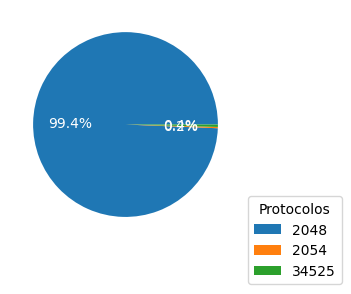

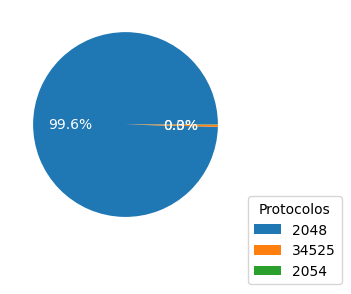

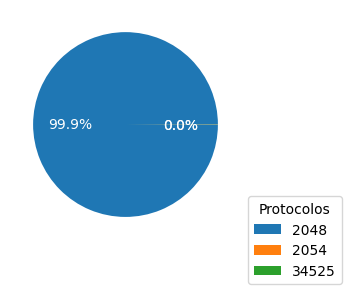

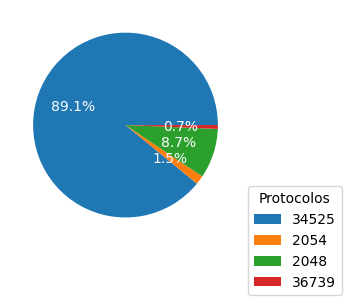

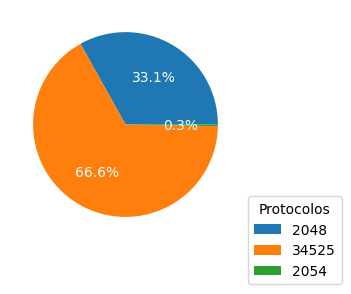

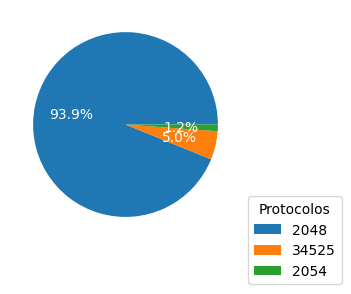

In [6]:
files = Path('outputs').glob('*.csv')
filenames = []
entropias = []
for file in files:
    S1 = {}
    direcciones = {'BROADCAST': 0, 'UNICAST': 0}
    protocolos = {}
    total = 20000

    with open(file, newline='') as csvfile:
        filename = file.name[:-4]
        filenames.append(filename)
        reader = csv.reader(csvfile, )
        next(reader, None)  # skip the headers
        for [dire, proto, count] in reader:
            S1[(dire, int(proto))] = int(count)
            direcciones[dire] += int(count)
            if proto not in protocolos:
                protocolos[proto] = 0
            protocolos[proto] += int(count)

        porcentaje_direcciones(S1, direcciones, protocolos, total, filename)
        porcentaje_protocolos(S1, direcciones, protocolos, total, filename)
        informacion_simbolos(S1, direcciones, protocolos, total, filename)
        entropias.append(entropia(S1))




<generator object Path.glob at 0x0000019AA98C3350>


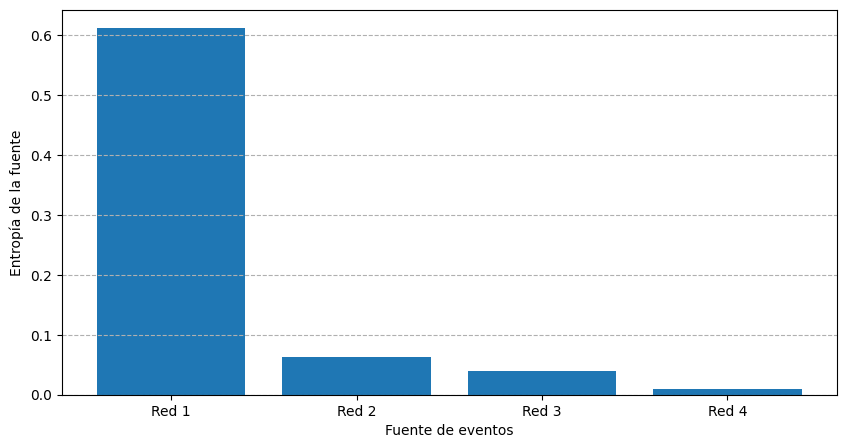

In [7]:
print(files)
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
names = ["Red 1", "Red 2", "Red 3", "Red 4"]
entropias_ordenado = [entropias[3]] + entropias[:3]
plt.bar(names, entropias_ordenado)
plt.grid(axis="y", linestyle="--")
plt.xlabel("Fuente de eventos")
plt.ylabel("Entropía de la fuente")
#plt.title("Students enrolled in different courses")
plt.savefig(f"graficos/entropias", bbox_inches="tight")

In [11]:
red_2 = dict([(('192.168.0.11', '192.168.0.11'),30),
(('192.168.0.1', '192.168.0.19'),50),
(('192.168.0.19', '192.168.0.1'),50),
(('192.168.0.13', '192.168.0.10'),1),
(('192.168.0.13', '192.168.0.14'),1),
(('192.168.0.11', '192.168.0.1'),1),
(('192.168.0.10', '192.168.0.1'),2)])


red_3 = dict([(('192.168.0.1', '192.168.0.7'),2),
(('192.168.0.7', '192.168.0.1'),1),
(('192.168.0.7', '192.168.0.8'),7),
(('192.168.0.8', '192.168.0.7'),7),
(('192.168.0.1', '192.168.0.8'),6),
(('192.168.0.8', '192.168.0.1'),6),
(('192.168.0.7', '192.168.0.2'),1),
(('192.168.0.5', '192.168.0.1'),1),
(('192.168.0.7', '192.168.0.9'),1),
(('192.168.0.7', '192.168.0.5'),1),
(('192.168.0.5', '192.168.0.7'),1)])

red_5 = dict([(('192.168.0.1', '192.168.0.72'),13),
(('192.168.0.72', '192.168.0.1'),13 ),
(('192.168.0.1', '192.168.0.143'),3 ),
(('192.168.0.72', '192.168.0.171'),2 ),
(('192.168.0.171', '192.168.0.72'),2 ),
(('192.168.0.143', '192.168.0.1'),1 ),
(('192.168.0.1', '192.168.0.160'),9 ),
(('192.168.0.139', '192.168.0.139'),2 ),
(('192.168.0.139', '192.168.0.1'),2 ),
(('192.168.0.1', '192.168.0.81'),2 ),
(('192.168.2.166', '192.168.2.254'),6 ),
(('192.168.2.254', '192.168.2.166'),5 ),
(('192.168.2.166', '192.168.2.166'),2 ),
(('192.168.2.177', '192.168.2.177'),1 ),
(('192.168.2.173', '192.168.2.173'),1 ),
(('192.168.2.206', '192.168.2.206'),1 ),
(('192.168.2.62', '192.168.2.62'),1 ),
(('192.168.2.200', '192.168.2.200'),1 ),
(('192.168.2.161', '192.168.2.161'),1 ),
(('192.168.2.70', '192.168.2.70'),1 ),
(('192.168.2.245', '192.168.2.245'),1 ),
(('192.168.2.75', '192.168.2.75'),1 ),
(('192.168.2.77', '192.168.2.77'),1 ),
(('192.168.2.252', '192.168.2.252'),1 ),
(('0.0.0.0', '192.168.0.72'),3 ),
(('192.168.0.72', '192.168.0.72'),3 ),
(('192.168.0.1', '192.168.0.45'),3 ),
(('0.0.0.0', '192.168.0.13'),3 ),
(('192.168.0.13', '192.168.0.13'),3 ),
(('192.168.0.13', '192.168.0.1'),4 ),
(('192.168.0.1', '192.168.0.13'),4)])



# Punto opcional

In [143]:
import math

def graficar_dst(red, fig_width, fig_height, filename):
    cant_pedidos = {};

    for key in red:
        if key[1] not in cant_pedidos:
            cant_pedidos[key[1]] = 0
        cant_pedidos[key[1]] += red[key]
    plt.figure(figsize = (fig_width, fig_height))
    plt.bar(list(cant_pedidos.keys()), list(cant_pedidos.values()))
    plt.xlabel("Dirección IP Destino")
    plt.ylabel("Cantidad de pedidos")
    max_cant = max(list(cant_pedidos.values()))
    step = math.floor((max_cant + 1) /10)
    stop = max_cant + step
    plt.yticks(range(0, stop, step))
    plt.grid(axis="y", linestyle="--")
    plt.savefig(f"graficos/" + filename, bbox_inches="tight")
    plt.show()
    return

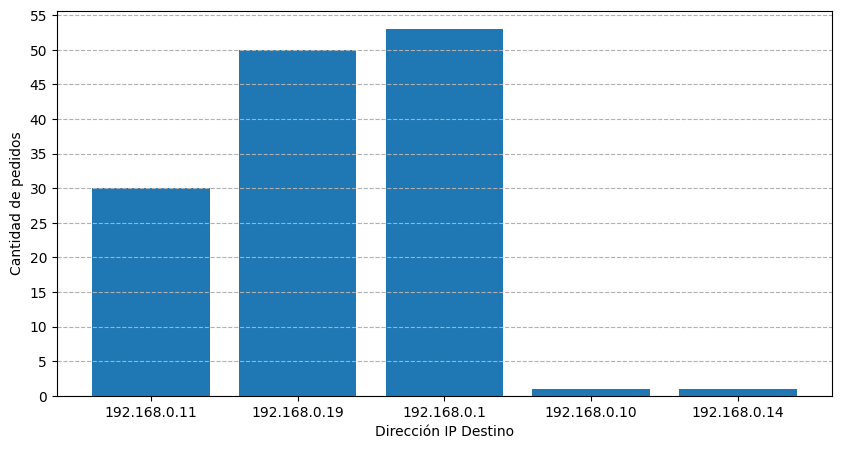

In [144]:
graficar_dst(red_2, 10, 5, "cant_dst_red_2")

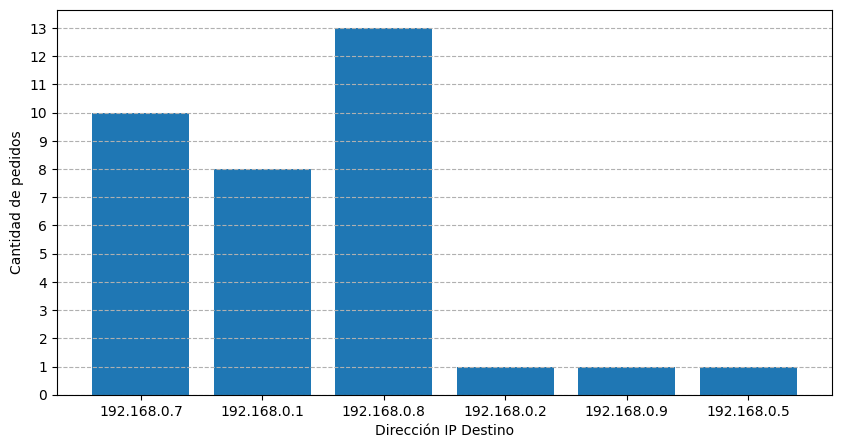

In [145]:
graficar_dst(red_3, 10, 5, "cant_dst_red_3")

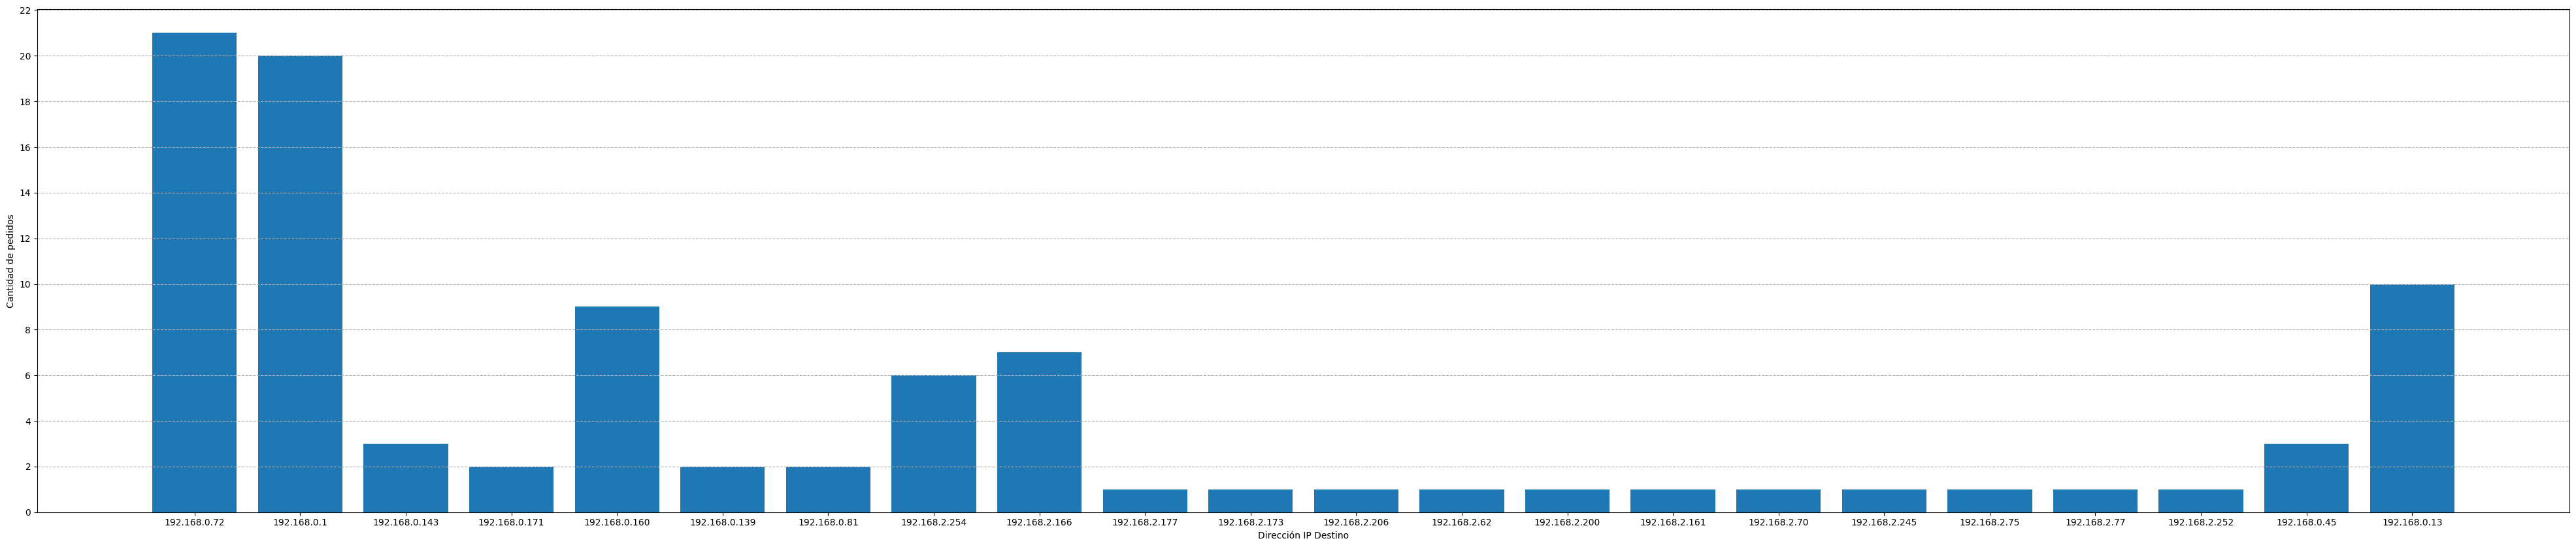

In [146]:
graficar_dst(red_5, 50, 10, "cant_dst_red_5")

In [147]:
def graficar_src(red, fig_width, fig_height, filename):
    cant_pedidos = {};

    for key in red:
        if key[0] not in cant_pedidos:
            cant_pedidos[key[0]] = 0
        cant_pedidos[key[0]] += red[key]
    plt.figure(figsize = (fig_width, fig_height))
    plt.bar(list(cant_pedidos.keys()), list(cant_pedidos.values()))
    plt.xlabel("Dirección IP Fuente")
    plt.ylabel("Cantidad de pedidos")
    max_cant = max(list(cant_pedidos.values()))
    step = math.floor((max_cant + 1) /10)
    stop = max_cant + step
    plt.yticks(range(0, stop, step))
    plt.grid(axis="y", linestyle="--")
    plt.savefig(f"graficos/" + filename, bbox_inches="tight")
    plt.show()
    return

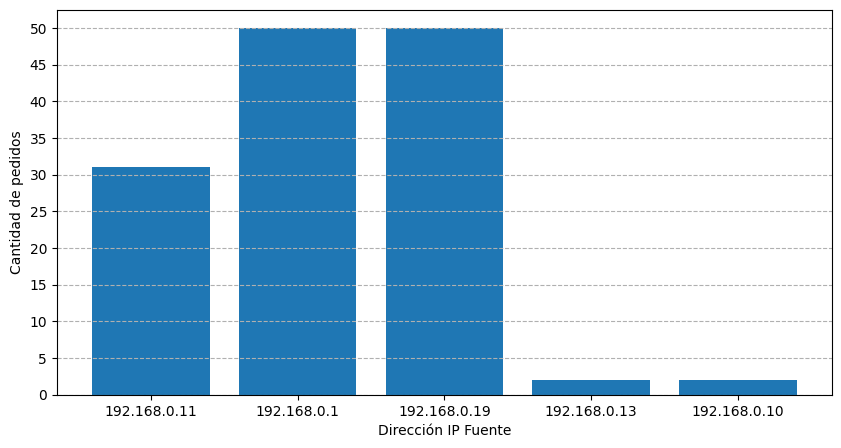

In [148]:
graficar_src(red_2, 10, 5, "cant_src_red_2")

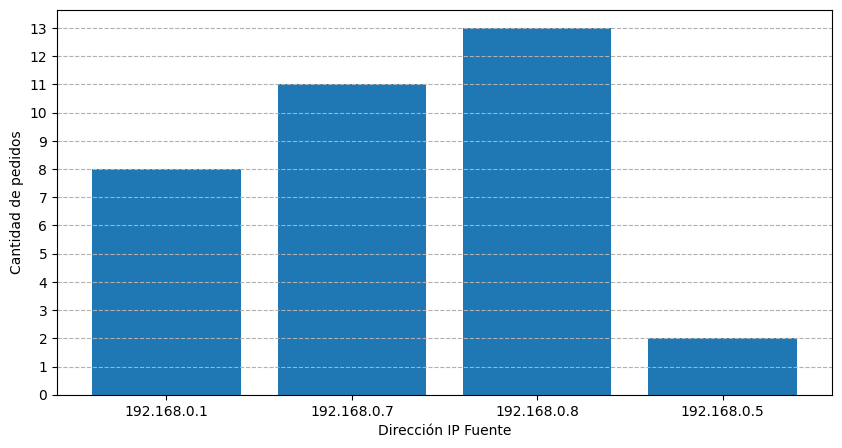

In [149]:
graficar_src(red_3, 10, 5, "cant_src_red_3")

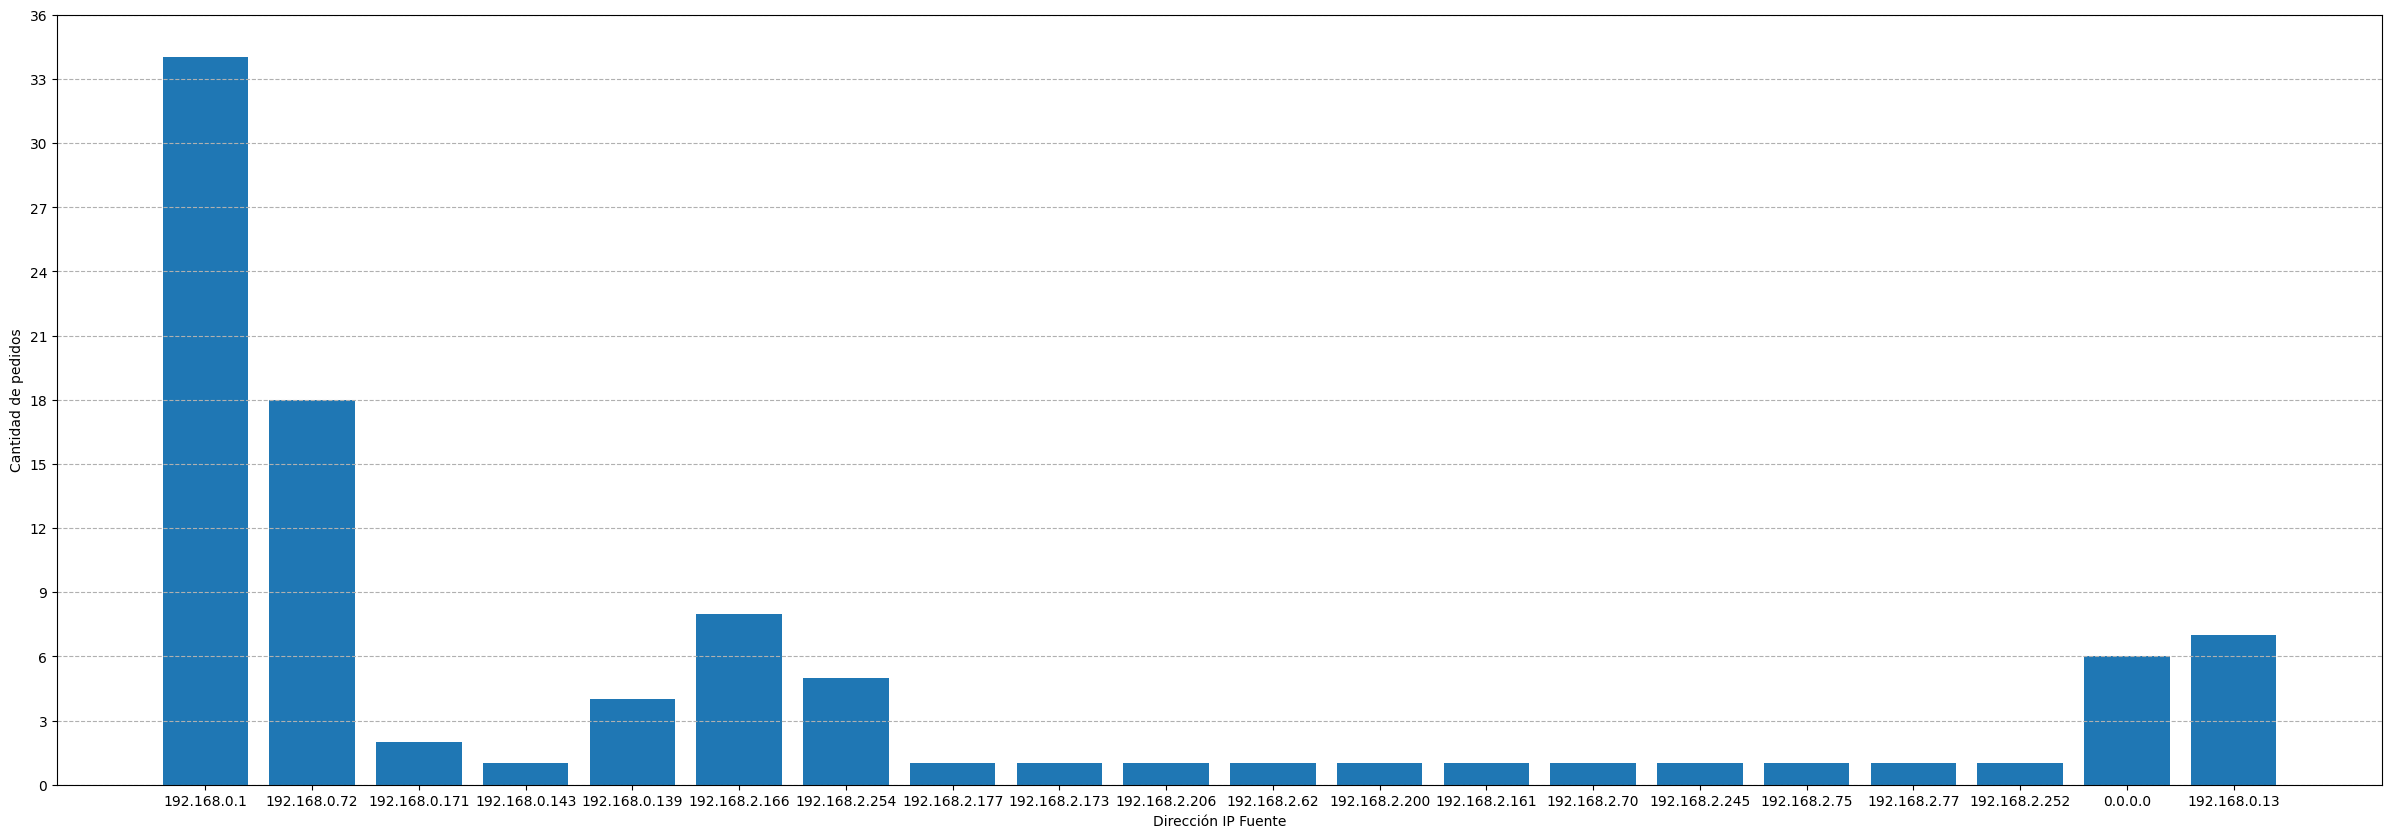

In [150]:
graficar_src(red_5, 30, 10, "cant_src_red_5")

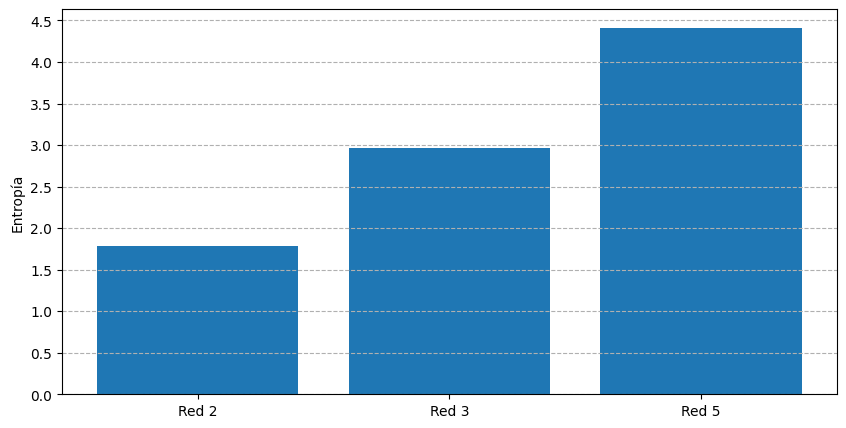

In [151]:
import numpy as np

redes = ['Red 2', 'Red 3', 'Red 5']
entropias = [entropia(red_2), entropia(red_3), entropia(red_5)]
plt.figure(figsize = (10, 5))
plt.bar(redes, entropias)
plt.ylabel("Entropía")
plt.grid(axis="y", linestyle="--")
plt.yticks(np.arange(0, 5, 0.5))
plt.savefig(f"graficos/entropias_opc", bbox_inches="tight")
plt.show()

In [152]:
infos = [(e, info(e, red_2)) for e in red_2]
infos

[(('192.168.0.11', '192.168.0.11'), 2.1699250014423126),
 (('192.168.0.1', '192.168.0.19'), 1.4329594072761063),
 (('192.168.0.19', '192.168.0.1'), 1.4329594072761063),
 (('192.168.0.13', '192.168.0.10'), 7.076815597050831),
 (('192.168.0.13', '192.168.0.14'), 7.076815597050831),
 (('192.168.0.11', '192.168.0.1'), 7.076815597050831),
 (('192.168.0.10', '192.168.0.1'), 6.076815597050831)]